# Machine Learning ZoomCamp Chapter 3 Classification HomeWork

## Downlading Dataset

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-13 21:39:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-13 21:39:08 (76.8 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



## Importing neccesary libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Loading and Preparation

In [4]:
df=pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [16]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
target = ['converted']

In [5]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

### filling Non Values using `fillna()`

In [8]:
df[categorical] = df[categorical].fillna('NA')
df[numerical] = df[numerical].fillna(0.0)

In [9]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

# Question 1
Answer:

In [11]:
print(f"Answer is: {df.industry.mode()[0]}")

Answer is: retail


# Question 2
Answer

In [21]:
correlation_matrix = df[numerical].corr()

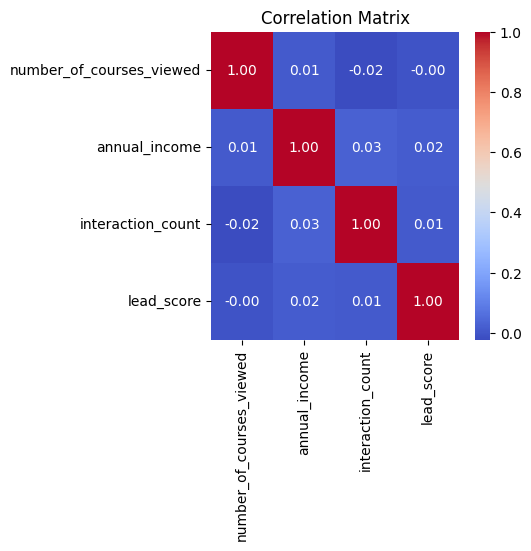

In [28]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The two features that has the biggest correlation are :
`annual_income` and `interaction_count`

## Splitting the Dataset

In [32]:
train_test_split

X = df[categorical + numerical]
y = df[target]

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test  = train_test_split(X_, y_, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((877, 8), (292, 8), (293, 8), (877, 1), (292, 1), (293, 1))

# Question 3
Answer:

In [40]:
def mutual_info_score_converted(series):
    return mutual_info_score(series, y_train['converted'])


In [41]:
X_train[categorical].apply(mutual_info_score_converted)

lead_source          0.028192
industry             0.015059
employment_status    0.018339
location             0.003457
dtype: float64

Answer is : `lead_source`

# Question 4
Answer:

In [45]:
# Combine categorical and numerical features into dictionaries for one-hot encoding
dv = DictVectorizer(sparse=False)
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')

# Apply one-hot encoding
X_train_encoded = dv.fit_transform(X_train_dict)
X_val_encoded = dv.transform(X_val_dict)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train.values.ravel())

# Make predictions on the validation dataset
y_val_pred = model.predict(X_val_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Answer: Validation Accuracy: {accuracy:.2f}")

Answer: Validation Accuracy: 0.74


# Question 5
Answer

In [47]:
# Train the model with all features and record the original accuracy
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')

X_train_encoded = dv.fit_transform(X_train_dict)
X_val_encoded = dv.transform(X_val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train.values.ravel())

y_val_pred = model.predict(X_val_encoded)
original_accuracy = accuracy_score(y_val, y_val_pred)

# Perform feature elimination
feature_accuracies = {}
for feature in categorical + numerical:
    # Exclude the feature
    X_train_reduced = X_train.drop(columns=[feature])
    X_val_reduced = X_val.drop(columns=[feature])
    
    # One-hot encode the reduced dataset
    X_train_reduced_dict = X_train_reduced.to_dict(orient='records')
    X_val_reduced_dict = X_val_reduced.to_dict(orient='records')
    
    X_train_reduced_encoded = dv.fit_transform(X_train_reduced_dict)
    X_val_reduced_encoded = dv.transform(X_val_reduced_dict)
    
    # Train the model without the feature
    model.fit(X_train_reduced_encoded, y_train.values.ravel())
    y_val_reduced_pred = model.predict(X_val_reduced_encoded)
    
    # Record the accuracy
    reduced_accuracy = accuracy_score(y_val, y_val_reduced_pred)
    feature_accuracies[feature] = original_accuracy - reduced_accuracy

print("Feature differences:", feature_accuracies)

Feature differences: {'lead_source': 0.013698630136986245, 'industry': 0.0, 'employment_status': -0.003424657534246589, 'location': 0.0, 'number_of_courses_viewed': 0.06506849315068486, 'annual_income': -0.113013698630137, 'interaction_count': 0.06849315068493145, 'lead_score': 0.0}


Answer is: `employment_status`

# Question 6
Answer

In [49]:
# Define the values of C to test
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store accuracies for each value of C
accuracies = {}

# Train models for each value of C
for C in C_values:
    # Train logistic regression model
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_encoded, y_train.values.ravel())
    
    # Make predictions on the validation dataset
    y_val_pred = model.predict(X_val_encoded)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies[C] = round(accuracy, 7)

# Print the accuracies for each value of C
for C, acc in accuracies.items():
    print(f"C={C}: Validation Accuracy={acc}")

C=0.01: Validation Accuracy=0.7431507
C=0.1: Validation Accuracy=0.7431507
C=1: Validation Accuracy=0.7431507
C=10: Validation Accuracy=0.7431507
C=100: Validation Accuracy=0.7431507


Amswer is: `0.01`